In [48]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

In [49]:
def plot_signal(signal, sr=1000, t=1, samples_to_show=500, title="Signal", xlabel="Time (s)", ylabel="Amplitude"):
    plt.figure(figsize=(10, 4))
    time_axis = np.linspace(0, t, len(signal))  # ensure time axis matches signal length
    plt.plot(time_axis[:samples_to_show], signal[:samples_to_show])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Sinyal Sinus & Kosinus
sinyal kosinus dan sinus adalah bentuk gelombang dasar yang sangat penting. Keduanya adalah gelombang periodik yang memiliki bentuk mulus dan berulang. Perbedaan utama di antara keduanya adalah fase awal atau pergeseran fase relatif satu sama lain.

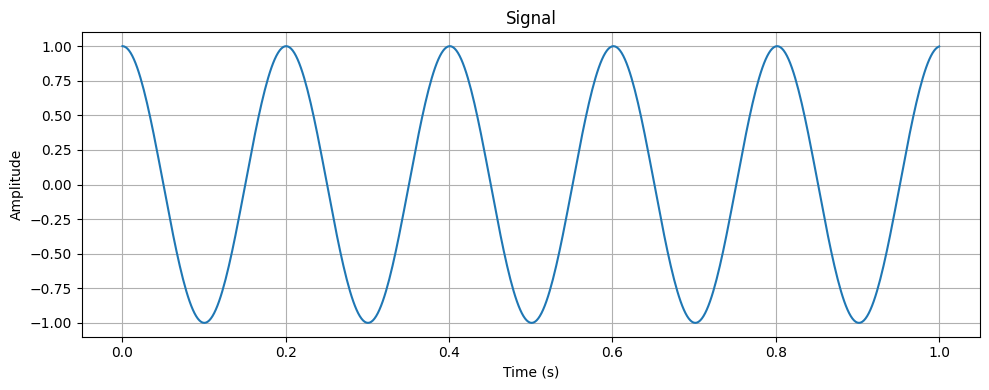

In [50]:
duration = 1
sr = 500
freq = 5

t = np.linspace(0, duration, int(sr * duration), endpoint=False)
sine_signal = np.cos(2 * np.pi * freq * t)

plot_signal(sine_signal, sr, t=duration, samples_to_show=2000)

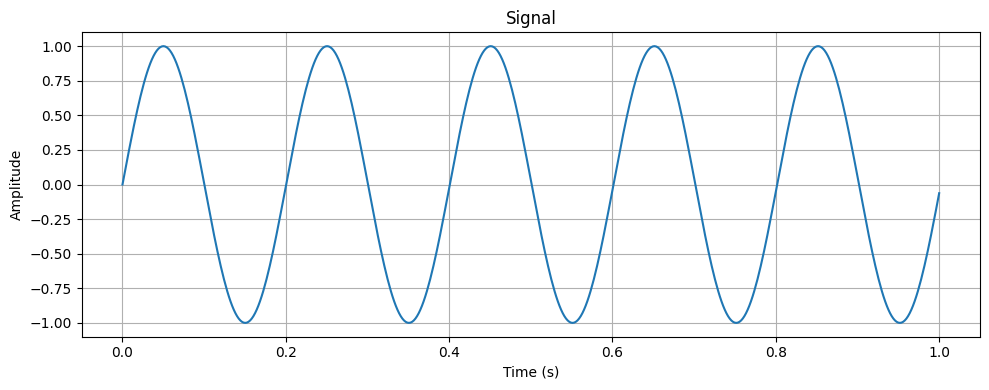

In [51]:
duration = 1
sr = 500
freq = 5

t = np.linspace(0, duration, int(sr * duration), endpoint=False)
A = 1 # amplitudo
sine_signal = A * np.sin(2 * np.pi * freq * t)

plot_signal(sine_signal, sr, t=duration, samples_to_show=2000)

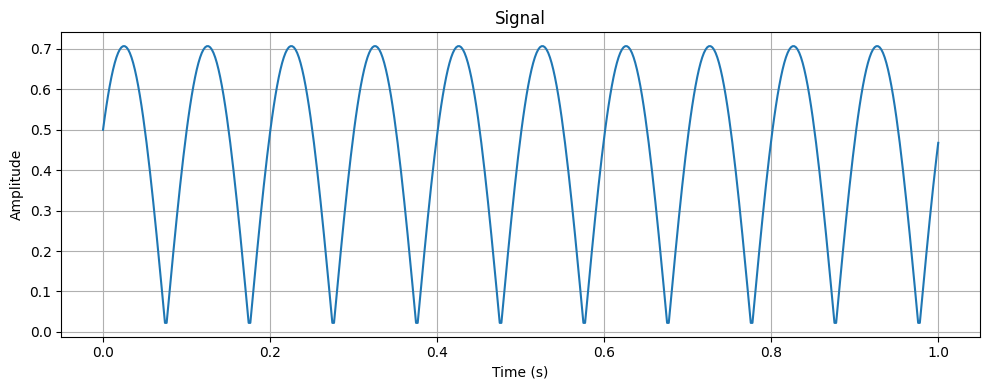

In [52]:
sine_wave = np.sin(2 * np.pi * freq * t)
cosine_wave = np.cos(2 * np.pi * freq * t)

mixed_signal = 0.5 * sine_wave + 0.5 * cosine_wave
rectified_signal = np.abs(mixed_signal)

plot_signal(rectified_signal, sr, t=duration, samples_to_show=1000)

## Mixing Signal
Ketika kita mencampur dua atau lebih sinyal, kita secara efektif menjumlahkan nilai amplitudo (atau intensitas piksel untuk gambar) dari setiap sinyal pada setiap titik waktu (atau lokasi piksel).

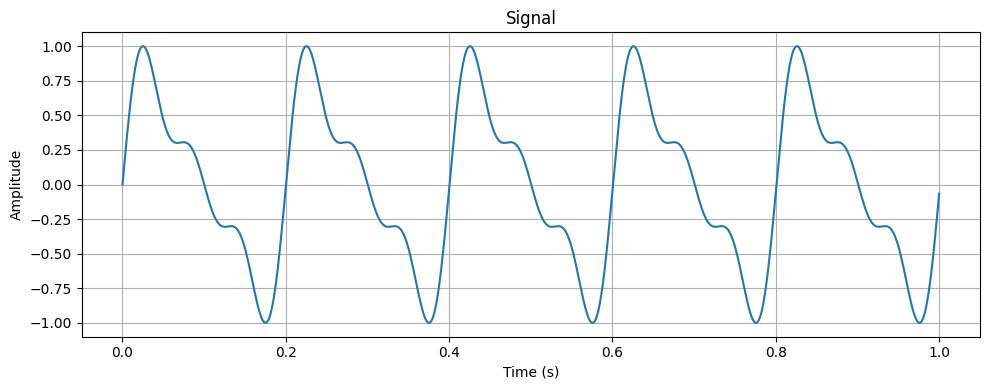

In [53]:
sr = 1000          # sample rate (Hz)
duration = 1.0     # seconds
freq = 5           # base frequency (Hz)
t = np.linspace(0, duration, int(sr * duration), endpoint=False)

wave = (
    1.0 * np.sin(2 * np.pi * freq * t) +
    0.5 * np.sin(2 * np.pi * 2 * freq * t) +
    0.33 * np.sin(2 * np.pi * 3 * freq * t)
)

# Normalisasi
wave /= np.max(np.abs(wave))
plot_signal(wave, sr, t=duration, samples_to_show=1000)

## Waves 
sinyal adalah representasi matematika dari suatu fenomena yang berubah seiring waktu. 
Sinyal ini kontinu, artinya ia memiliki nilai pada setiap momen waktu, tidak peduli seberapa kecil intervalnya

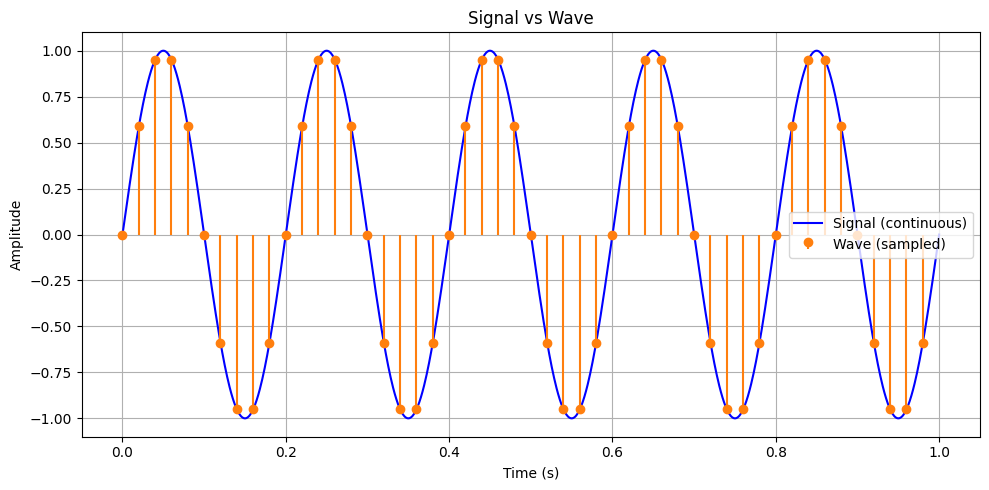

In [54]:
def signal_function(t, freq=5):    
    # sinyal analog ideal berbentuk gelombang sinus yang berulang freq kali per detik
    return np.sin(2 * np.pi * freq * t)

t_cont = np.linspace(0, 1, 1000) 
signal_values = signal_function(t_cont)

sr = 50  
t_wave = np.linspace(0, 1, sr, endpoint=False)
wave_values = signal_function(t_wave)

plt.figure(figsize=(10, 5))
plt.plot(t_cont, signal_values, label='Signal (continuous)', color='blue')
plt.stem(t_wave, wave_values, linefmt='C1-', markerfmt='C1o', basefmt=' ', label='Wave (sampled)')
plt.title("Signal vs Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Spectrum
Spektrum mengacu pada distribusi energi sinyal (atau magnitudo) pada frekuensi yang berbeda. Hal ini dihitung dengan menggunakan Transformasi Fourier.

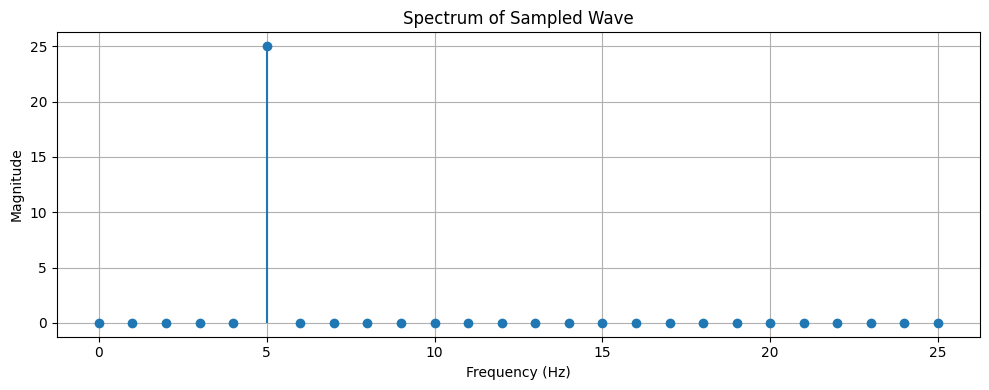

In [55]:
N = len(wave_values)
fft_vals = np.fft.rfft(wave_values)
frequencies = np.fft.rfftfreq(N, d=1/sr)
magnitude = np.abs(fft_vals)

# 6. Plot Spectrum
plt.figure(figsize=(10, 4))
plt.stem(frequencies, magnitude, basefmt=' ')
plt.title("Spectrum of Sampled Wave")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()

## Time-Domain Signal
Perubahan sinyal (nilai/amplitudo) dalam kurun waktu tertentu

## Frequency-Domain Signal
Perubahan sinyal sesuai dengan komponen frekuensinya (yaitu, frekuensi apa saja yang ada dan seberapa kuatnya).

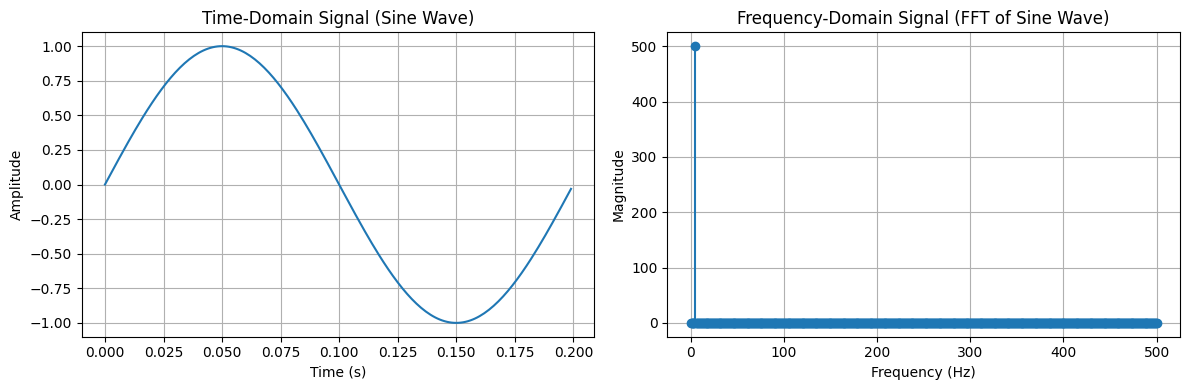

In [56]:
sr = 1000          # Sample rate in Hz
duration = 1.0     # Duration in seconds
freq = 5           # Frequency of sine wave (Hz)

# Sumbu Waktu
t = np.linspace(0, duration, int(sr * duration), endpoint=False)

# Pembuatan Gelombang Sinus (Domain Waktu)
sine_wave = np.sin(2 * np.pi * freq * t)

# Komputasi Domain Frekuensi menggunakan FFT (Fast Fourier Transform)
N = len(sine_wave)
fft_vals = np.fft.rfft(sine_wave)
frequencies = np.fft.rfftfreq(N, d=1/sr)
magnitude = np.abs(fft_vals)

# Plotting Sinyal
# Plot Time-Domain Signal
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t[:200], sine_wave[:200])  # show 200 samples 
plt.title("Time-Domain Signal (Sine Wave)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot Frequency-Domain Signal
plt.subplot(1, 2, 2)
plt.stem(frequencies, magnitude, basefmt=" ")
plt.title("Frequency-Domain Signal (FFT of Sine Wave)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)

plt.tight_layout()
plt.show()

# Suara Kucing

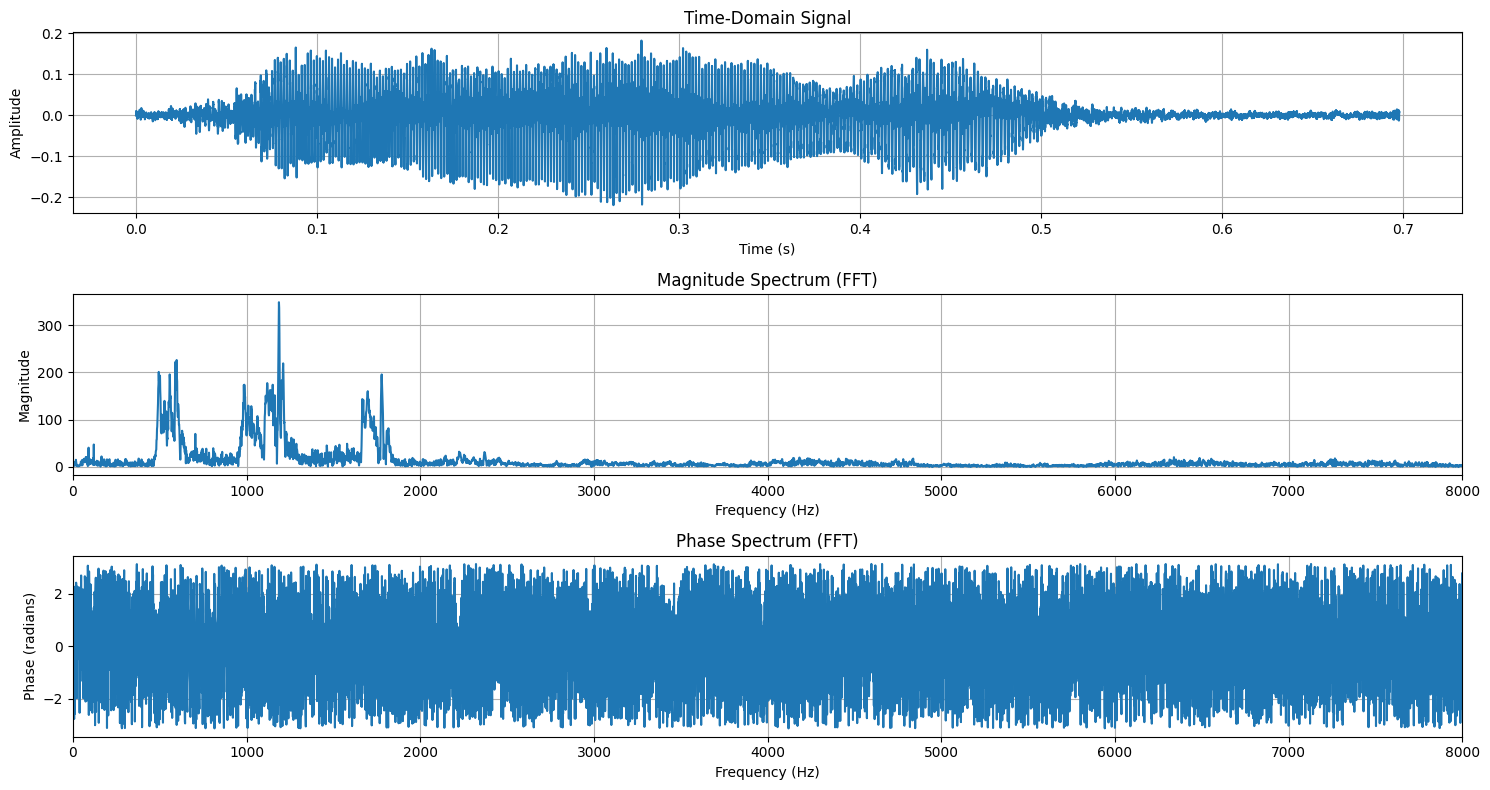

In [57]:
import librosa 

file_path = "/kaggle/input/1d-and-2d-signal-dataset/catsound.wav"

try:
    # sr=None akan memuat sinyal dengan sample rate aslinya
    y, sr = librosa.load(file_path, sr=None)

    # Memastikan sinyal hanya sepanjang 1 detik atau memotongnya jika lebih panjang
    y = y[:sr] # Mengambil 1 detik pertama sinyal (jika ada)

    # Sumbu waktu
    t = np.linspace(0, len(y) / sr, num=len(y))

    # Komputasi Fast Fourier Transform (FFT)
    N = len(y)
    fft_vals = np.fft.rfft(y)
    frequencies = np.fft.rfftfreq(N, d=1/sr)
    magnitude = np.abs(fft_vals)
    phase = np.angle(fft_vals)

    # Plotting
    plt.figure(figsize=(15, 8))

    plt.subplot(3, 1, 1)
    plt.plot(t, y)
    plt.title("Time-Domain Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.plot(frequencies, magnitude)
    plt.title("Magnitude Spectrum (FFT)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(0, 8000) # Batasi tampilan frekuensi agar lebih mudah dibaca
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(frequencies, phase)
    plt.title("Phase Spectrum (FFT)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Phase (radians)")
    plt.xlim(0, 8000) # Batasi tampilan frekuensi agar lebih mudah dibaca
    plt.grid(True)

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan. Pastikan nama file dan path sudah benar dan dataset sudah ditambahkan ke notebook.")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

In [61]:
from scipy.signal import butter, filtfilt
import IPython.display as ipd

def butter_filter(data, sr, cutoff, btype='low', order=5):
    nyq = 0.5 * sr
    normal_cutoff = np.array(cutoff) / nyq if isinstance(cutoff, (list, tuple)) else cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)


Duration: 0.70 seconds


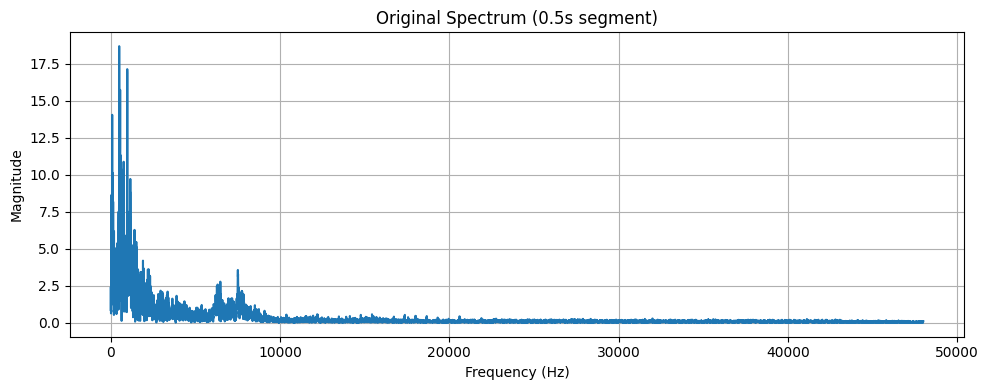

In [62]:
file_path = "/kaggle/input/1d-and-2d-signal-dataset/catsound.wav"
y, sr = librosa.load(file_path, sr=None)

# Menampilkan Durasi Sinyal
duration_sec = len(y) / sr
print(f"Duration: {duration_sec:.2f} seconds")

# Mengambil Segmen Sinyal (Windowing)
start_time = 0.5
end_time = start_time + 0.5

# Mengubah start_time dari detik menjadi indeks sampel
start_sample = int(start_time * sr)
end_sample = int(min(len(y), end_time * sr))

segment = y[start_sample:end_sample]

# Pengecekan Segmen Kosong
if len(segment) == 0:
    raise ValueError("Segment is empty. Choose a valid start time and ensure the signal is long enough.")

# Komputasi Spektrum Frekuensi (FFT)
N = len(segment)
fft_vals = np.fft.rfft(segment)
frequencies = np.fft.rfftfreq(N, d=1/sr)
magnitude = np.abs(fft_vals)

# Plot Spektrum Magnitude
plt.figure(figsize=(10, 4))
plt.plot(frequencies, magnitude)
plt.title("Original Spectrum (0.5s segment)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Listen to original segment
ipd.Audio(segment, rate=sr)

In [63]:
# Low-pass filter (below 1000 Hz)
low = butter_filter(segment, sr, cutoff=1000, btype='low')
ipd.display(ipd.Audio(low, rate=sr))

# High-pass filter (above 1000 Hz)
high = butter_filter(segment, sr, cutoff=1000, btype='high')
ipd.display(ipd.Audio(high, rate=sr))

# Band-stop filter (remove 500–2000 Hz)
bandstop = butter_filter(segment, sr, cutoff=[500, 2000], btype='bandstop')
ipd.display(ipd.Audio(bandstop, rate=sr))

## Low-Pass Filter
Melewatkan frekuensi di bawah ambang batas (misal, 1000 Hz) dan meredam frekuensi tinggi. Berguna untuk menghilangkan noise frekuensi tinggi dan menekankan suara "bass" atau "dalam".

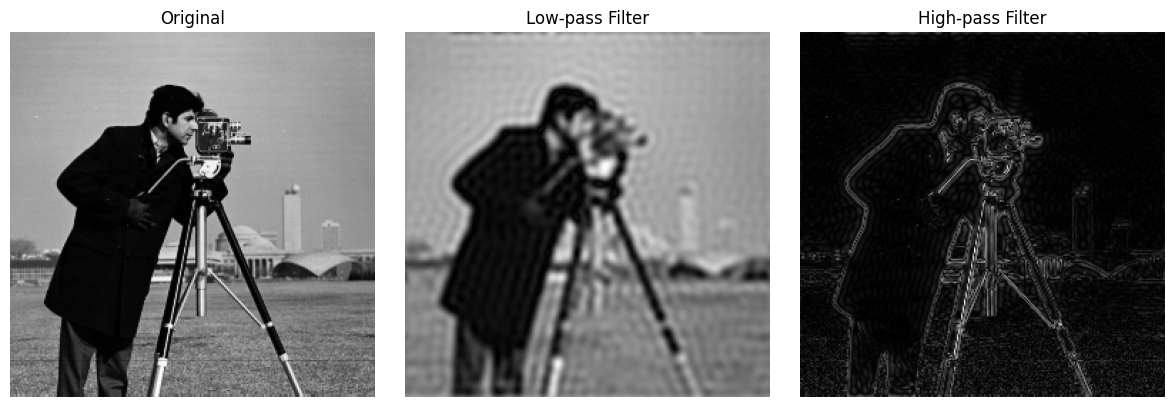

In [58]:
import cv2
from PIL import Image
import requests
from io import BytesIO

# Download gambar Cameraman
img_pil = Image.open('/kaggle/input/1d-and-2d-signal-dataset/cameraman.png').convert("L")  # Grayscale
img = np.array(img_pil)
img = cv2.resize(img, (256, 256))

# FFT
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Masking
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2
radius = 30

low_pass_mask = np.zeros((rows, cols), np.uint8)
cv2.circle(low_pass_mask, (ccol, crow), radius, 1, thickness=-1)
high_pass_mask = 1 - low_pass_mask

# Apply filter
f_low = fshift * low_pass_mask
f_high = fshift * high_pass_mask

# Inverse FFT
img_low = np.abs(np.fft.ifft2(np.fft.ifftshift(f_low)))
img_high = np.abs(np.fft.ifft2(np.fft.ifftshift(f_high)))

# Tampilkan hasil
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(img_low, cmap='gray')
axs[1].set_title("Low-pass Filter")
axs[2].imshow(img_high, cmap='gray')
axs[2].set_title("High-pass Filter")
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()


## High-Pass Filter
Melewatkan frekuensi di atas ambang batas (misal, 1000 Hz) dan meredam frekuensi rendah. Berguna untuk menghilangkan noise frekuensi rendah dan memperjelas bagian sinyal frekuensi tinggi (vokal, instrumen tinggi).

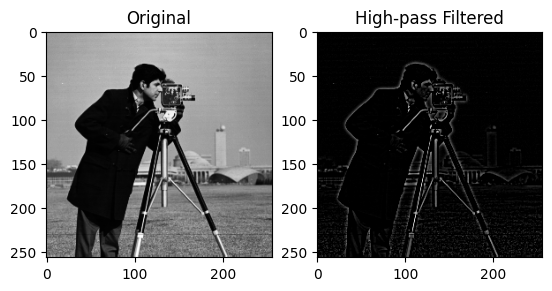

In [59]:
blur = cv2.GaussianBlur(img, (11,11), 0)
high_pass = cv2.subtract(img, blur)

plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(high_pass, cmap='gray'), plt.title('High-pass Filtered')
plt.show()

## Band-Stop Filter
Menghilangkan sinyal dalam rentang frekuensi tertentu (misal, 500-2000 Hz) dan melewatkan frekuensi di luar rentang tersebut. Berguna untuk menghapus frekuensi spesifik yang mengganggu atau mengisolasi frekuensi rendah dan tinggi.

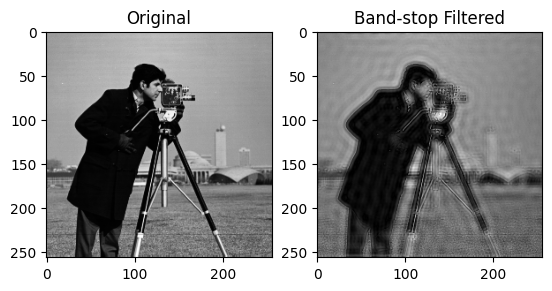

In [60]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Buat band-stop filter di domain frekuensi
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
mask = np.ones((rows, cols), np.uint8)
r_out, r_in = 60, 20  # Rentang radius bandstop
for i in range(rows):
    for j in range(cols):
        d = np.sqrt((i-crow)**2 + (j-ccol)**2)
        if r_in < d < r_out:
            mask[i,j] = 0

fshift_filtered = fshift * mask
img_back = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))
img_back = np.abs(img_back)

plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(img_back, cmap='gray'), plt.title('Band-stop Filtered')
plt.show()
